# 训练AlexNet

In [1]:
import torch
from torch import nn
import d2l_torch as d2l

In [ ]:
net=nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10))

In [3]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)

loss 0.332, train acc 0.880, test acc 0.878
397.5 examples/sec on cuda:0


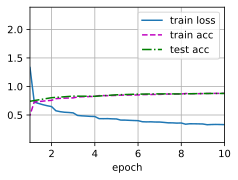

In [ ]:
lr=0.01
epochs=10
d2l.train_ch6(net,train_iter,test_iter,epochs,lr,d2l.try_gpu())

# 练习

## 加大epoch，观察是否过拟合

训练AlexNet50轮

loss 0.116, train acc 0.957, test acc 0.922
395.0 examples/sec on cuda:0


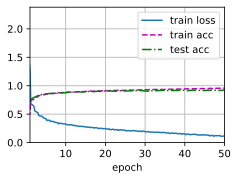

In [ ]:
d2l.train_ch6(net,train_iter,test_iter,50,lr,d2l.try_gpu())

In [ ]:
!nvidia-smi

Mon Jan 17 04:57:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    70W / 149W |   2298MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import time

开始训练Lenet的50轮

In [ ]:
Lenet_net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

In [ ]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=None)

loss 0.204, train acc 0.923, test acc 0.899
19059.8 examples/sec on cuda:0


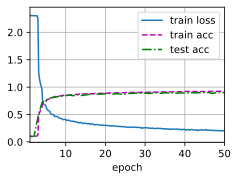

In [ ]:
lr, num_epochs = 0.9, 50
d2l.train_ch6(Lenet_net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 自定义网络结构

开始训练自己自定义的网络

In [8]:
net_improve_one=nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5,padding=1),nn.ReLU(),
    nn.AvgPool2d(kernel_size=3,padding=1),
    # 默认有stride， stride: the stride of the window. Default value is kernel_size
    nn.Conv2d(6,24,kernel_size=3),nn.ReLU(),
    nn.Conv2d(24,36,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(36,36,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(36,24,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1),nn.Flatten(),
    nn.Linear(216,90), nn.Dropout(p=0.5),nn.ReLU(),
    nn.Linear(90,60), nn.ReLU(),
    nn.Linear(60,10))

In [9]:
X = torch.rand(size=(1, 1, 28, 28),dtype=torch.float32)
for layer in net_improve_one:
    X= layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 26, 26])
ReLU output shape: 	 torch.Size([1, 6, 26, 26])
AvgPool2d output shape: 	 torch.Size([1, 6, 9, 9])
Conv2d output shape: 	 torch.Size([1, 24, 7, 7])
ReLU output shape: 	 torch.Size([1, 24, 7, 7])
Conv2d output shape: 	 torch.Size([1, 36, 7, 7])
ReLU output shape: 	 torch.Size([1, 36, 7, 7])
Conv2d output shape: 	 torch.Size([1, 36, 7, 7])
ReLU output shape: 	 torch.Size([1, 36, 7, 7])
Conv2d output shape: 	 torch.Size([1, 24, 7, 7])
ReLU output shape: 	 torch.Size([1, 24, 7, 7])
MaxPool2d output shape: 	 torch.Size([1, 24, 3, 3])
Flatten output shape: 	 torch.Size([1, 216])
Linear output shape: 	 torch.Size([1, 90])
Dropout output shape: 	 torch.Size([1, 90])
ReLU output shape: 	 torch.Size([1, 90])
Linear output shape: 	 torch.Size([1, 60])
ReLU output shape: 	 torch.Size([1, 60])
Linear output shape: 	 torch.Size([1, 10])


loss 0.288, train acc 0.894, test acc 0.884
15754.7 examples/sec on cuda:0


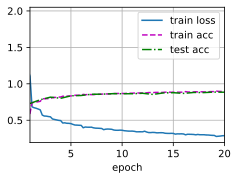

In [6]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=None)

lr, num_epochs = 0.1, 20
d2l.train_ch6(net_improve_one, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## AlexNet换掉一个4096的Dense层

In [ ]:
Alex_net=nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,2048),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(2048,10))

In [ ]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)

loss 0.327, train acc 0.880, test acc 0.882
399.2 examples/sec on cuda:0


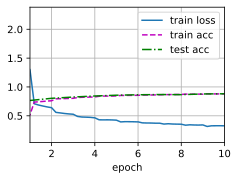

In [ ]:
lr=0.01
epochs=10
d2l.train_ch6(Alex_net,train_iter,test_iter,epochs,lr,d2l.try_gpu())

## AlexNet去掉一个4096的Dense层

In [2]:
Alex_net_2=nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10))

loss 0.294, train acc 0.892, test acc 0.885
543.9 examples/sec on cuda:0


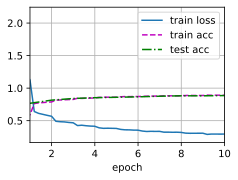

In [4]:
lr=0.01  
num_epochs=10
d2l.train_ch6(Alex_net_2,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())